In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pprint import pprint

%matplotlib inline

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris

In [6]:
data = load_iris(as_frame=True)
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


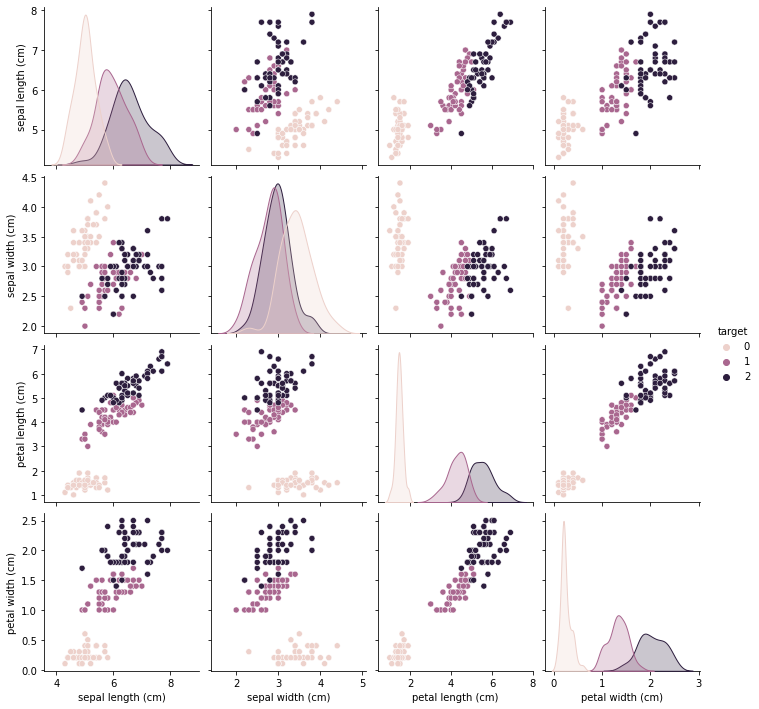

In [9]:
sns.pairplot(data.frame, hue="target")

In [10]:
corr = data.frame.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [14]:
new_columns = ["petal width (cm)", "petal length (cm)"]
lin_iris = data.frame.drop([c for c in data.frame.columns if c not in new_columns], axis="columns")
display(lin_iris)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [16]:
X = lin_iris.values[:, :1]
y = lin_iris.values[:, 1:2]

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
pred = lin_reg.predict(X_test)
accuracy_score = lin_reg.score(X_train, y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.9373993040848391


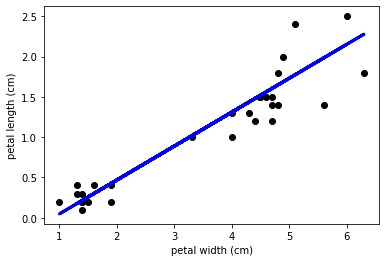

In [22]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.show()

<AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>

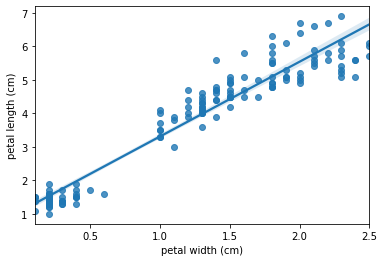

In [23]:
sns.regplot(x="petal width (cm)", y="petal length (cm)", data=lin_iris)

In [24]:
new_columns = ['sepal length (cm)', 'petal length (cm)']
poly_iris = data.frame.drop([c for c in data.frame.columns if c not in new_columns], axis='columns')

display(poly_iris)

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [26]:
corr = poly_iris.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal length (cm),petal length (cm)
sepal length (cm),1.000000,0.871754
petal length (cm),0.871754,1.000000


In [27]:
X = poly_iris.iloc[:, 0].values
y = poly_iris.iloc[:, 0:1].values

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

y_pred = pipeline.predict(X_test.reshape(-1, 1))
